## Different imports and setup

In [1]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf

In [3]:
from Tools import Plot
from Tools import Custom_models

## Load a model

In [13]:
model_name = 'Saved_models/test'
model = keras.models.load_model(model_name)

In [14]:
model.summary()

Model: "model_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               multiple                  200       
_________________________________________________________________
dense2 (Dense)               multiple                  9898      
_________________________________________________________________
dense3 (Dense)               multiple                  99        
Total params: 10,197
Trainable params: 10,197
Non-trainable params: 0
_________________________________________________________________


In [15]:
weights1 = model.get_layer(name='dense1').get_weights()
weights2 = model.get_layer(name='dense2').get_weights()
weights3 = model.get_layer(name='dense3').get_weights()

In [16]:
core1 = weights1[0].flatten()
bias1 = weights1[1].flatten()
core2 = weights2[0].flatten()
bias2 = weights2[1].flatten()
core3 = weights3[0].flatten()
bias3 = weights3[1].flatten()

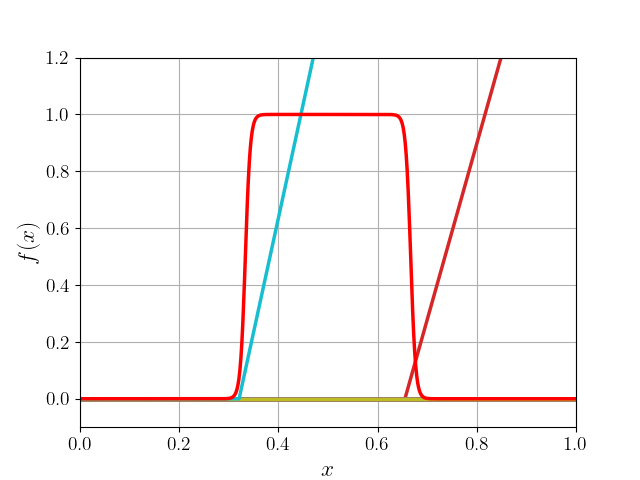

In [17]:
x = np.linspace(0, 1, 1000)
y = 1/2*(1 + np.tanh(100*(x-1/3))) - 1/2*(1 + np.tanh(100*(x-2/3)))

filename = 'Figures/1D_Relu_functions/2_layer_default_init.pdf'
save = False

plt.figure()
for i in range(100):
    plt.plot(x, tf.nn.relu(core1[i]*x + bias1[i]))
plt.plot(x, y, 'r-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim([-0.1, 1.2])
plt.xlim([0,1])
plt.grid()
plt.show()
if (save):
    plt.savefig(filename, bbox_inches='tight')

In [10]:
print(core2)

[-0.06233388  0.07622331  0.13128132 ... -0.41133124 -0.25746924
 -4.5326395 ]


In [11]:
print(bias2)

[ 9.25897181e-01 -6.00429252e-02 -1.27501458e-01 -2.32165754e-01
 -3.95303845e-01 -3.73185337e-01 -3.32495987e-01 -3.04490626e-01
 -5.10637879e-01 -5.93366772e-02 -4.80856672e-02 -5.23122370e-01
 -8.50835815e-02 -9.59553123e-02 -1.11570418e-01 -6.00510351e-02
 -1.46152616e-01 -8.32650587e-02 -4.15951192e-01 -1.59679912e-02
 -1.66585058e-01 -2.32085772e-02 -8.23064446e-01 -4.08538848e-01
 -3.60099912e-01 -4.39433506e-07 -6.97543292e-05 -1.17323041e-01
 -2.16076791e-01 -5.35821617e-01 -3.11065823e-01 -2.48375207e-01
 -7.83501135e-04 -2.03335211e-01 -8.46524537e-02  0.00000000e+00
 -4.02817018e-02 -2.83595681e-01 -3.84366244e-01 -1.41532749e-01
 -6.00537322e-02 -1.88758045e-01 -7.79069781e-01 -3.96948367e-01
 -2.08759099e-01 -3.35546434e-01 -6.00537360e-02 -4.39765930e-01
 -2.28682009e-04 -6.96441205e-03 -3.75022829e-01 -5.55304959e-02
 -9.93664116e-02 -7.16216326e-01 -3.83974286e-03 -5.90433627e-02
 -5.51973470e-02 -5.12958504e-02 -7.55350292e-02 -6.04548037e-01
 -3.20043474e-01 -5.55219

In [12]:
-bias1/core1 < 1

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True])